In [48]:
import scipy.stats as staty
import numpy as np
import pandas as pd
from random import sample
from matplotlib import pyplot as plt
Kibergrad = pd.read_csv('Kibergrad.csv')
Kibergrad

,'TIP','CLANOV','OTROK','DOHODEK','CETRT','IZOBRAZBA'
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [49]:
Kibergrad_otroci = list(Kibergrad["'OTROK'"])



 a) Vzemite enostavni slučajni vzorec 200 družin in na njegovi podlagi ocenite povprečno število otrok na družino v Kibergradu.

Povprečno število otrok na podlagi vzorca 200 družin je 0.94.

 b) Ocenite standardno napako in postavite 95% interval zaupanja.

Ocena standardne napake je 0.07800452720101289.
Interval zaupanja za dani vzorec je (0.7861784621048826, 1.0938215378951173).

 c) Vzorčno povprečje in ocenjeno standardno napako primerjajte s populacijskim povprečjem in pravo standardno napako. Ali interval zaupanja iz prejšnje točke pokrije populacijsko povprečje?

Populacijsko povprečje je 0.9479332816843641, prava standardna napaka pa 0.0816404987959038.
Populacijsko povprečje se nahaja v našem intervalu zaupanja vzetega vzorca.

 d) Vzemite še 99 enostavnih slučajnih vzorcev in prav tako za vsakega določite 95% interval zaupanja. Narišite intervale zaupanja, ki pripadajo tem 100 vzorcem.  Koliko jih pokrije populacijsko povprečje? 



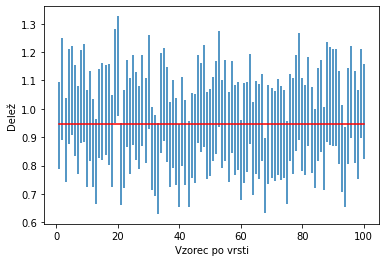

Število intervalov zaupanja, ki vsebujejo populacijsko povprečje, je 95.

 e) Izračunajte standardni odklon vzorčnih povprečij za 100 prej dobljenih vzorcev. Primerjajte s pravo standardno napako za vzorec velikosti 200.



In [50]:
print('\n a) Vzemite enostavni slučajni vzorec 200 družin in na njegovi podlagi ocenite '
      'povprečno število otrok na družino v Kibergradu.\n')
N = 43886
n = 200
alpha = 0.05
stevilo_pokritij = 0
vzorec = sample(Kibergrad_otroci, n)
povprecje_vzorca = np.average(vzorec)
print('Povprečno število otrok na podlagi vzorca 200 družin je ' + str(povprecje_vzorca) + '.')
################################################################################
print('\n b) Ocenite standardno napako in postavite 95% interval zaupanja.\n')
standardna_napaka_vzorca = np.sqrt((N-n)/(N*(n-1))*staty.moment(vzorec, 2))
print('Ocena standardne napake je ' + str(standardna_napaka_vzorca) + '.')
student_inv = staty.t.isf(alpha/2, n-1)
odstop = student_inv * standardna_napaka_vzorca
sp_meja = povprecje_vzorca - odstop
zg_meja = povprecje_vzorca + odstop
print('Interval zaupanja za dani vzorec je (' + str(sp_meja) + ', ' + str(zg_meja) + ').')
################################################################################
print('\n c) Vzorčno povprečje in ocenjeno standardno napako primerjajte s populacijskim '
    'povprečjem in pravo standardno napako. Ali interval zaupanja iz prejšnje točke '
    'pokrije populacijsko povprečje?\n')
populacijsko_povprecje = np.average(Kibergrad_otroci)
populacijski_standardni_odklon = np.sqrt(staty.moment(Kibergrad_otroci, 2))
prava_standardna_napaka = np.sqrt((N-n)/((N-1)*n))*populacijski_standardni_odklon
print('Populacijsko povprečje je ' + str(populacijsko_povprecje) + ', prava standardna napaka pa '
      + str(prava_standardna_napaka) + '.')
if populacijsko_povprecje > sp_meja and populacijsko_povprecje < zg_meja:
    stevilo_pokritij += 1
    print('Populacijsko povprečje se nahaja v našem intervalu zaupanja vzetega vzorca.')
else:
    print('Populacijsko povprečje pade ven iz našega intervala zaupanja vzetega vzorca.')
################################################################################
print('\n d) Vzemite še 99 enostavnih slučajnih vzorcev in prav tako za vsakega določite '
    '95% interval zaupanja. Narišite intervale zaupanja, ki pripadajo tem 100 vzorcem. '
    ' Koliko jih pokrije populacijsko povprečje? \n')
stevilo_vzorcev = 99
povprecja = [povprecje_vzorca]
odstopanja = [odstop]
standardne_napake = [standardna_napaka_vzorca]
for i in range(stevilo_vzorcev):
    vzorec = sample(Kibergrad_otroci, n)
    povprecje = np.average(vzorec)
    povprecja.append(povprecje)
    standardna_napaka = np.sqrt((N-n)/(N*(n-1))*staty.moment(vzorec, 2))
    odstop = student_inv * standardna_napaka
    odstopanja.append(odstop)
    standardne_napake.append(standardna_napaka)
    if populacijsko_povprecje > povprecje - odstop and populacijsko_povprecje < povprecje + odstop:
        stevilo_pokritij += 1
P1 = []
P2 = []
for x in range(stevilo_vzorcev + 1):
    P1.append(populacijsko_povprecje)
    P2.append(prava_standardna_napaka)
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Delež')
plt.errorbar(range(1, stevilo_vzorcev + 2), povprecja, xerr=0, yerr=odstopanja, fmt='none')
plt.plot(range(1,2 + stevilo_vzorcev), P1, 'r')
plt.show()    
    
print('Število intervalov zaupanja, ki vsebujejo populacijsko povprečje, je ' + str(stevilo_pokritij) + '.')
################################################################################
print('\n e) Izračunajte standardni odklon vzorčnih povprečij za 100 prej dobljenih vzorcev. '
    'Primerjajte s pravo standardno napako za vzorec velikosti 200.\n')
################################################################################



 e) Izračunajte standardni odklon vzorčnih povprečij za 100 prej dobljenih vzorcev. Primerjajte s pravo standardno napako za vzorec velikosti 200.



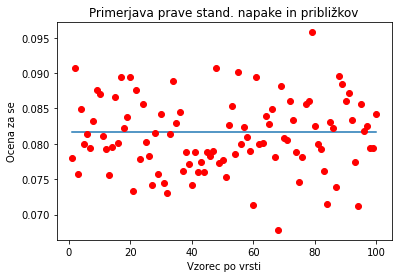

Povprečje vzorčnih standardnih odklonov: 0.08110988157478655
Minimalni vzorčni standardni odklon: 0.06783009161408717
Maksimalni vzorčni standardni odklon: 0.09577097378176286


In [51]:
print('\n e) Izračunajte standardni odklon vzorčnih povprečij za 100 prej dobljenih vzorcev. '
    'Primerjajte s pravo standardno napako za vzorec velikosti 200.\n')

povprecje_standardnih_napak = np.average(standardne_napake)
max_std = max(standardne_napake)
min_std = min(standardne_napake)

plt.title('Primerjava prave stand. napake in približkov')
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Ocena za se')
plt.plot(range(1, stevilo_vzorcev + 2), P2)
plt.plot(range(1, stevilo_vzorcev + 2), standardne_napake, 'ro')
plt.show()

print('Povprečje vzorčnih standardnih odklonov: ' + str(povprecje_standardnih_napak))
print('Minimalni vzorčni standardni odklon: ' + str(min_std))
print('Maksimalni vzorčni standardni odklon: ' + str(max_std))
################################################################################


 f) Izvedite prejšnji dve točki še na 100 vzorcih po 800 družin. Primerjajte in razložite razlike s teorijo vzorčenja.



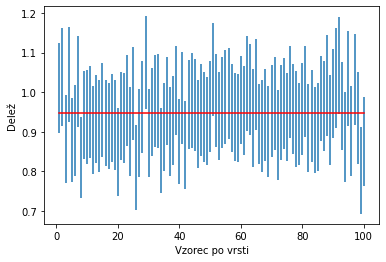

Število intervalov zaupanja, ki vsebujejo populacijsko povprečje, je 96.


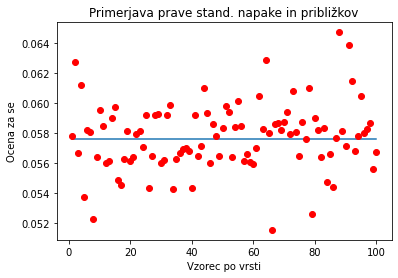

Povprečje vzorčnih standardnih odklonov: 0.05772448307818105
Minimalni vzorčni standardni odklon: 0.05151490087032361
Maksimalni vzorčni standardni odklon: 0.06473032126782936


In [52]:
print('\n f) Izvedite prejšnji dve točki še na 100 vzorcih po 800 družin. Primerjajte in '
    'razložite razlike s teorijo vzorčenja.\n')
N = 43886
n = 400
alpha = 0.05
stevilo_pokritij = 0
stevilo_vzorcev = 100
povprecja = []
odstopanja = []
standardne_napake = []
prava_standardna_napaka = np.sqrt((N-n)/((N-1)*n))*populacijski_standardni_odklon
for i in range(stevilo_vzorcev):
    vzorec = sample(Kibergrad_otroci, n)
    povprecje = np.average(vzorec)
    povprecja.append(povprecje)
    standardna_napaka = np.sqrt((N-n)/(N*(n-1))*staty.moment(vzorec, 2))
    odstop = student_inv * standardna_napaka
    odstopanja.append(odstop)
    standardne_napake.append(standardna_napaka)
    if populacijsko_povprecje > povprecje - odstop and populacijsko_povprecje < povprecje + odstop:
        stevilo_pokritij += 1
P1 = []
P2 = []
for x in range(stevilo_vzorcev):
    P1.append(populacijsko_povprecje)
    P2.append(prava_standardna_napaka)
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Delež')
plt.errorbar(range(1, stevilo_vzorcev + 1), povprecja, xerr=0, yerr=odstopanja, fmt='none')
plt.plot(range(1,1 + stevilo_vzorcev), P1, 'r')
plt.show()   

print('Število intervalov zaupanja, ki vsebujejo populacijsko povprečje, je ' + str(stevilo_pokritij) + '.')

povprecje_standardnih_napak = np.average(standardne_napake)
max_std = max(standardne_napake)
min_std = min(standardne_napake)

plt.title('Primerjava prave stand. napake in približkov')
plt.xlabel('Vzorec po vrsti')
plt.ylabel('Ocena za se')
plt.plot(range(1, stevilo_vzorcev + 1), P2)
plt.plot(range(1, stevilo_vzorcev + 1), standardne_napake, 'ro')
plt.show()

print('Povprečje vzorčnih standardnih odklonov: ' + str(povprecje_standardnih_napak))
print('Minimalni vzorčni standardni odklon: ' + str(min_std))
print('Maksimalni vzorčni standardni odklon: ' + str(max_std))